In [1]:
#Q2.

def estimate_population_mean(sample_mean, sample_stddev, sample_size):
    """
    Estimates the population mean using a sample mean, sample standard deviation, and sample size.
    
    Args:
        sample_mean (float): The mean of the sample.
        sample_stddev (float): The standard deviation of the sample.
        sample_size (int): The size of the sample.
        
    Returns:
        float: The estimated population mean.
    """
    import math
    
    # Calculate the standard error (standard deviation of the sample mean)
    standard_error = sample_stddev / math.sqrt(sample_size)
    
    # Calculate the estimated population mean
    population_mean = sample_mean
    
    return population_mean


sample_mean = 50.0
sample_stddev = 10.0
sample_size = 100

estimated_mean = estimate_population_mean(sample_mean, sample_stddev, sample_size)
print(f"Estimated Population Mean: {estimated_mean}")

Estimated Population Mean: 50.0


In [2]:
#Q5.

import numpy as np
from scipy.stats import t

def two_sample_t_test(sample1, sample2, alpha, null_hypothesis):
    n1 = len(sample1)
    n2 = len(sample2)
    dof = n1 + n2 - 2

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    s1 = np.std(sample1, ddof=1)
    s2 = np.std(sample2, ddof=1)

    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / dof)
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

    if null_hypothesis == "equal":
        p_value = 2 * (1 - t.cdf(abs(t_statistic), dof))
    elif null_hypothesis == "less":
        p_value = t.cdf(t_statistic, dof)
    elif null_hypothesis == "greater":
        p_value = 1 - t.cdf(t_statistic, dof)

    if p_value < alpha:
        result = "Reject the null hypothesis"
    else:
        result = "Fail to reject the null hypothesis"

    return t_statistic, p_value, result

# Example usage
sample1 = np.array([25, 30, 28, 35, 32])
sample2 = np.array([18, 20, 22, 28, 25])
alpha = 0.05
null_hypothesis = "equal"

t_statistic, p_value, result = two_sample_t_test(sample1, sample2, alpha, null_hypothesis)

print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(result)

T-statistic: 3.006044515698833
P-value: 0.016915162442360465
Reject the null hypothesis


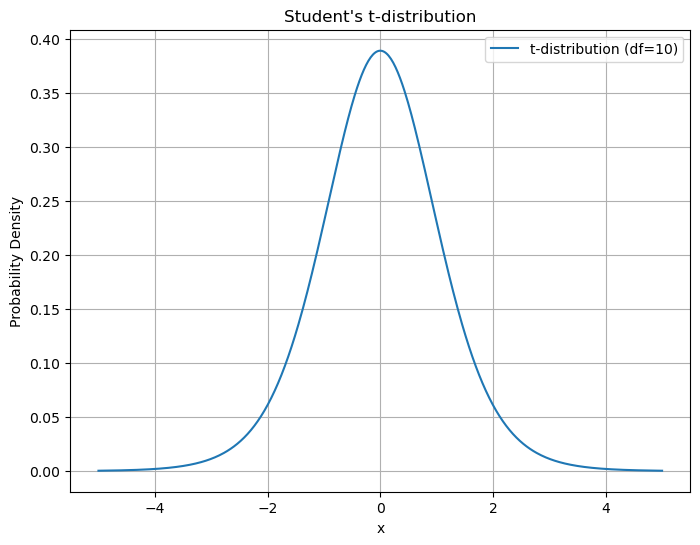

In [3]:
#Q9.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Set the degrees of freedom
df = 10

# Generate a range of x values
x = np.linspace(-5, 5, 500)

# Compute the corresponding y values using the t-distribution
y = t.pdf(x, df)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"t-distribution (df={df})")
plt.title("Student's t-distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#Q10.

import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2):
    # Calculate means and standard deviations
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)  # ddof=1 for sample standard deviation
    std2 = np.std(sample2, ddof=1)

    # Calculate the t-statistic
    n1 = len(sample1)
    n2 = len(sample2)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

    # Calculate degrees of freedom
    dof = n1 + n2 - 2

    # Calculate the p-value using a two-tailed test
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), dof))

    return t_statistic, p_value

# Example data
sample1 = np.array([23, 27, 30, 34, 29])
sample2 = np.array([21, 25, 28, 32, 26])

# Calculate t-statistic and p-value
t_statistic, p_value = two_sample_t_test(sample1, sample2)

# Print results
print(f"Calculated t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Population means are not equal.")
else:
    print("Fail to reject null hypothesis: Population means are equal.")

Calculated t-statistic: 0.8615864949867542
P-value: 0.41399272627352723
Fail to reject null hypothesis: Population means are equal.
